## Lottery Ticket Experiment using `prunhild`
Check `experiments.py` for the code. The parameters are specified in `config.py`.


You can pass commandline parameters using a list:
```python
cmdline_args = ["--cutoff-ratio", "0.1", "--print-interval", "200"]
logs_prune, logs_retrain = run_experiment(cmdline_args)
```

In [1]:
#parameters
%run experiment.py --help

usage: experiment.py [-h] [--no-cuda] [--seed S] [--seed-dataloader S]
                     [--seed-retrain S] [--seed-dataloader-retrain S]
                     [--datafolder PATH_TO_FOLDER] [--dataset DATASET]
                     [--epochs N] [--batch-size N] [--batch-size-eval N]
                     [--lr LR] [--momentum M] [--cutoff-ratio RATIO]
                     [--prune-interval N] [--prune-delay N]
                     [--print-interval N] [--eval_interval N]

`prunhild` MNIST example

optional arguments:
  -h, --help            show this help message and exit
  --no-cuda             disables CUDA training
  --seed S              random seed (default: 2)
  --seed-dataloader S   random seed dataloader (default: 2)
  --seed-retrain S      random seed for retraining (default: 2)
  --seed-dataloader-retrain S
                        random seed dataloader for retraining (default: 2)
  --datafolder PATH_TO_FOLDER
                        path to datafolder (default: ~/data/torch)

### Running the experiment

In [2]:
import pandas as pd
from experiment import run_experiment

In [3]:
logs_prune, logs_retrain = run_experiment([])

Pruning Start
[Train] Epoch: 1 [0/60000 (0%)]	Loss: 2.295587
[Model] parameters zero: (1.0 / 266610.0 | 0.00)
[Eval] Train set: Average loss: 2.3036, Accuracy: 5962/60000 (0.10)
[Eval] Test set: Average loss: 2.3014, Accuracy: 1017/10000 (0.10)
[Train] Epoch: 1 [6400/60000 (11%)]	Loss: 0.276296
[Model] parameters zero: (39990.0 / 266610.0 | 0.15)
[Eval] Train set: Average loss: 2.1334, Accuracy: 31693/60000 (0.53)
[Eval] Test set: Average loss: 2.1268, Accuracy: 5412/10000 (0.54)
[Train] Epoch: 1 [12800/60000 (21%)]	Loss: 0.279136
[Model] parameters zero: (73983.0 / 266610.0 | 0.28)
[Eval] Train set: Average loss: 1.9183, Accuracy: 47990/60000 (0.80)
[Eval] Test set: Average loss: 1.9072, Accuracy: 8136/10000 (0.81)
[Train] Epoch: 1 [19200/60000 (32%)]	Loss: 0.097666
[Model] parameters zero: (102878.0 / 266610.0 | 0.39)
[Eval] Train set: Average loss: 1.7597, Accuracy: 48715/60000 (0.81)
[Eval] Test set: Average loss: 1.7456, Accuracy: 8235/10000 (0.82)
[Train] Epoch: 1 [25600/60000 (4

In [4]:
column_names = ["Epoch", "Iteration", "Ratio Weights Zero", "Accuracy Train", "Accuracy Test"]

df_prune = pd.DataFrame(logs_prune, columns=column_names)
df_prune.set_index("Iteration", inplace=True)
df_retrain = pd.DataFrame(logs_retrain, columns=column_names)
df_retrain.set_index("Iteration", inplace=True)

df_merged = df_prune.merge(df_retrain, left_index=True, right_index=True, suffixes=(' (prune)', ' (retrain)'))

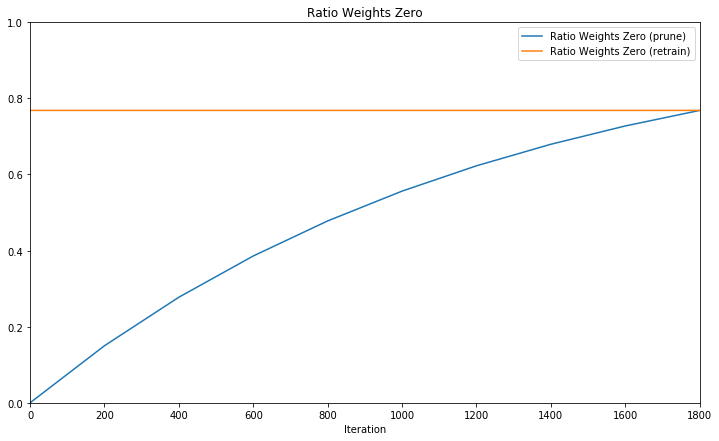

In [7]:
df_merged[["Ratio Weights Zero (prune)", "Ratio Weights Zero (retrain)"]].plot(ylim=(0, 1), title="Ratio Weights Zero", figsize=(12, 7))

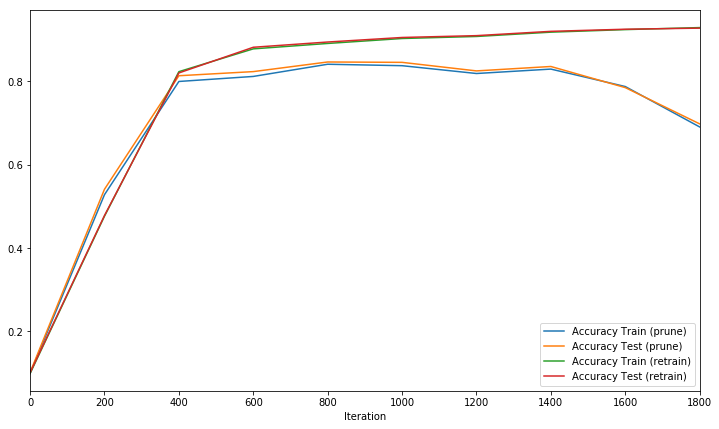

In [6]:
df_merged[["Accuracy Train (prune)", "Accuracy Test (prune)", "Accuracy Train (retrain)", "Accuracy Test (retrain)"]].plot(figsize=(12, 7))

Play around a bit with the `--cutoff-ratio` and pruning schedules `--prune-interval`